In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
filename = "bike-sharing/hour.csv"
rides =pd.read_csv(filename)

In [3]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday'] #所有类型编码变量的名称
for each in dummy_fields:
    #取出所有类型变量，并将它们转变为独热编码
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    #将新的独热编码变量与原有的所有变量合并到一起
    rides = pd.concat([rides, dummies], axis=1)

#将原来的类型变量从数据表中删除
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 
    'hr'] #要删除的类型变量的名称
data = rides.drop(fields_to_drop, axis=1) #将它们从数据库的变量中删除

data

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0000,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0000,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0000,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0000,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0000,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0.26,0.60,0.1642,11,108,119,1,0,...,0,0,0,0,1,0,0,0,0,0
17375,1,0,0.26,0.60,0.1642,8,81,89,1,0,...,0,0,0,0,1,0,0,0,0,0
17376,1,0,0.26,0.60,0.1642,7,83,90,1,0,...,1,0,0,0,1,0,0,0,0,0
17377,1,0,0.26,0.56,0.1343,13,48,61,1,0,...,0,1,0,0,1,0,0,0,0,0


In [4]:
quant_features = ['cnt', 'temp', 'hum', 'windspeed'] #数值类型变量的名称
scaled_features = {}  #将每一个变量的均值和方差都存储到scaled_features变量中
means, stds = list(),list()
for each in quant_features:
    #计算这些变量的均值和方差
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    #对每一个变量进行归一化
    data.loc[:, each] = (data[each] - mean)/std
    means.append(mean)
    stds.append(std)
data

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,3,13,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,8,32,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,5,27,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,3,10,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,0,1,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,-1.230743,-0.141133,-0.211685,11,108,-0.388467,1,0,...,0,0,0,0,1,0,0,0,0,0
17375,1,0,-1.230743,-0.141133,-0.211685,8,81,-0.553859,1,0,...,0,0,0,0,1,0,0,0,0,0
17376,1,0,-1.230743,-0.141133,-0.211685,7,83,-0.548346,1,0,...,1,0,0,0,1,0,0,0,0,0
17377,1,0,-1.230743,-0.348463,-0.456086,13,48,-0.708224,1,0,...,0,1,0,0,1,0,0,0,0,0


In [5]:
#将最后一个月的数据作为测试集
test_data = data[-30*24:] #选出训练集
train_data = data[:-30*24] #选出测试集

#目标列包含的字段
target_fields = ['cnt','casual', 'registered'] 

#训练集划分成特征变量列和目标特征列
features, targets = train_data.drop(target_fields, axis=1), train_data[target_fields]

#测试集划分成特征变量列和目标特征列
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

#将数据类型转换为NumPy数组
X = features.values  #将数据从pandas dataframe转换为NumPy
Y = targets['cnt'].values
Y = Y.astype(float)

Y = np.reshape(Y, [len(Y),1]) #把结果集转为一个个list

In [23]:
print(len(features),len(test_features))

16659 720


In [6]:

xtrain,xtest,ytrain,ytest = features.values,test_features.values,targets['cnt'].values,test_targets['cnt'].values

In [7]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import explained_variance_score

In [8]:
# 训练随机森林回归模型
rf_regressor = RandomForestRegressor(bootstrap=True, criterion='squared_error', max_depth=24,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)
rf_regressor.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=24, n_estimators=1500, n_jobs=-1,
                      oob_score=True, random_state=42)

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [22]:
y_pred = rf_regressor.predict(xtest)
mse = mean_squared_error(ytest,y_pred)
evs = explained_variance_score(ytest, y_pred)
print("\n#### 随机森林回归模型的表现 ####")
print("均方误差:", mse, 2)
print("解释方差分:", evs, 2)
print("评均绝对误差：",mean_absolute_error(ytest,y_pred))
print("袋外分数：",rf_regressor.oob_score_)
print("分类模型分数",rf_regressor.score(xtrain, ytrain))
print("R方值（R2_score）：",r2_score(ytest,y_pred))


#### 随机森林回归模型的表现 ####
均方误差: 0.19975313148010837 2
解释方差分: 0.7752395627582803 2
评均绝对误差： 0.3112583011570003
袋外分数： 0.9171503160708769
分类模型分数 0.9796819875638559
R方值（R2_score）： 0.7565658260728358


#### 随机森林回归模型第一轮的表现 ####
均方误差: 0.2
解释方差分: 0.78
平均绝对误差： 0.3112583011570003
袋外分数： 0.9171503160708769
分类模型分数 0.9796819875638559
R方值（R2_score）： 0.7565658260728358

In [16]:
y_pred

array([-1.47846802e-01,  3.38148987e-01, -4.87999960e-01, -5.20740980e-01,
       -7.58679760e-01, -8.89137888e-01, -9.80105593e-01, -9.63958290e-01,
       -9.51565847e-01, -8.68480984e-01, -6.56044964e-01, -5.03874202e-01,
       -1.17789566e-01,  6.39329648e-01,  9.56789627e-01,  8.46752486e-01,
        7.36939688e-01,  7.39914231e-01,  1.05360803e+00,  2.95652842e-01,
        4.19160548e-01,  9.07809974e-02,  5.99798961e-01,  6.98318754e-01,
        6.27378316e-01,  3.64096899e-01, -2.69090329e-01, -8.15068950e-01,
       -9.02254997e-01, -9.52051482e-01, -9.60394701e-01, -8.45307367e-01,
        7.88986285e-02,  4.96533470e-01,  2.05046494e+00,  6.39882295e-01,
        5.44584523e-01,  4.15007917e-01,  5.59160458e-01,  5.07303286e-01,
        4.94708307e-01,  5.13167897e-01,  1.51720487e+00,  3.17732992e+00,
        2.35191930e+00,  9.11935517e-01,  8.43496808e-01,  4.77115944e-01,
        3.80001810e-01,  1.64231002e-01, -4.09740017e-01, -8.17213412e-01,
       -9.13825839e-01, -

In [18]:
targets = test_targets['cnt']  #读取测试集的cnt数值
targets = targets.values.reshape([len(targets),1])  #将数据转换成合适的tensor形式
#转为实数
targets = targets.astype(float)  

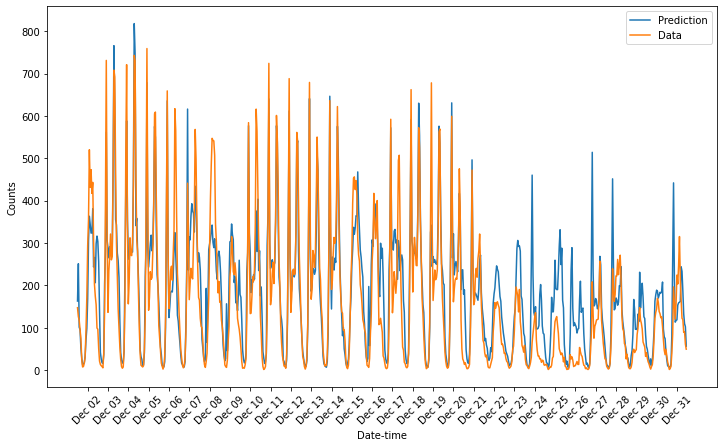

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12, 7))
mean, std = scaled_features['cnt']
ax.plot(y_pred * std + mean, label='Prediction')
ax.plot(targets * std + mean, label='Data')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')
dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)
fig.savefig('output/decisionTreeResult.svg',format='svg',dpi=150)

In [24]:
print(np.sqrt(mse))

0.4469375028794388
